<a href="https://colab.research.google.com/github/ejpark78/codelab/blob/master/kubeflow/%EC%A0%84%EC%9D%98_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.applications import InceptionV3
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

drive.mount( '/drive' )

Mounted at /drive


* 모델에 Inception V3를 설정해 줍니다. 
* 옵션으로 인풋 텐서를 지정해야 하므로 먼저 케라스 layers 클래스에서 임포트한 Input을 선언해 줍니다.
* 또한 우리는 FC 레이어 층을 다시 세팅할 것이므로 include_top을 False로 설정
합니댜 top 레이어가 FC 레이어를 의미합니다.
* weights를 imagenet 으로 설정하면 미리 학습된 가중치를 불러옵니다. 
* 가중치 없이 불러오려면 None 으로 설정합니다.
* 마지막으로 이 례이어들은 학습을 시키지 않고 고정시킬 것이므로 trainable을 False로 설정합니다. 
* for 문을 돌려서 레이어들의 설정을 모두 바꿔줍니다.

In [ ]:
input = Input(shape=(200, 200, 3))
model = InceptionV3(input_tensor=input, include_top=False, weights='imagenet', pooling='max')

for layer in model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


* 이제 FC 례이어 층을 쌓아줍니다. 
* 마지막 레이어의 결과값을 다음 레이어의 입력값으로 계속 연결해 줍니다. 
* 배치 정규화와 활성화 레이어도 반복적으로 배치합니다.
* 마지막으로 모델의 인풋과 아웃풋울 연결해 주면 완료됩니다.
* model.summary()를 이용하여 모델의 구조를 출력해서 확인해 보겠습니다.

In [ ]:
x = model.output

x = Dense(1024, name='fully', kernel_initializer='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, kernel_initializer='uniform')(x)
x = BatchNormalization()(x)
x = Activation('sigmoid')(x)
x = Dense(101, activation='softmax', name='softmax')(x)

model = Model(model.input, x)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
436/436 [==============================] - 3350s 8s/step - loss: 1.0866 - acc: 0.7937 - val_loss: 0.6385 - val_acc: 0.8383
Epoch 2/100
436/436 [==============================] - 42s 97ms/step - loss: 0.2461 - acc: 0.9466 - val_loss: 0.5213 - val_acc: 0.8667
Epoch 3/100
436/436 [==============================] - 43s 98ms/step - loss: 0.0951 - acc: 0.9793 - val_loss: 0.5026 - val_acc: 0.8637
Epoch 4/100
436/436 [==============================] - 42s 97ms/step - loss: 0.0580 - acc: 0.9865 - val_loss: 0.4050 - val_acc: 0.8938
Epoch 5/100
436/436 [==============================] - 42s 97ms/step - loss: 0.0524 - acc: 0.9875 - val_loss: 0.4045 - val_acc: 0.8879
Epoch 6/100
436/436 [==============================] - 42s 97ms/step - loss: 0.0451 - acc: 0.9891 - val_loss: 0.4874 - val_acc: 0.8773
Epoch 7/100
436/436 [=====

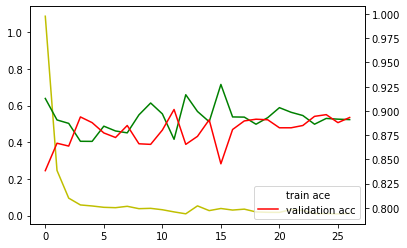

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from keras.layers import Dense, Input, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model, Sequential

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

batch_size = 16
input_image_size = (200, 200)
data_path = '/drive/My Drive/kubeflow/caltech101'

train_generator = train_datagen.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=input_image_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=input_image_size,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
from keras import optimizers

model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_acc')

hist = model.fit_generator(
    train_generator,
    epochs=100,
    callbacks=[early_stopping],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
)

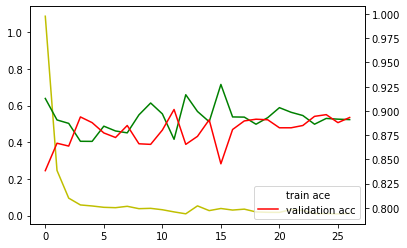

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')

acc_ax.plot(hist.history['acc'], ' b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'r', label='validation acc')

plt.legend(['train ace', 'validation acc'])
plt.show()

In [ ]:
model_name = '/drive/My Drive/kubeflow/caltech101-transfer.h5'

model.save(model_name) 